# Experiment protocol:
- The dataset was divided into training and testing parts in the ratio 80:20, that means 80% of the database will be used for training and 20% for testing.
- Predictions were based on beer amount and maximum temperature.
- Preprocessing was required because the dataset contains a large number of null values after the year is over.
- After removing null data, there were 365 data rows in the dataset, whereas the total amount was 366, which was considered a small loss.
- Results were evaluated using the coefficient of determination and the mean error.

<p>Dataset: Beer Consumption – Sao Paulo: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo </p>

# Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modifying chart parameters to better visualize the data


In [5]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Importing the dataset:

Some values are of object type and need to be treated.

In [6]:
df = pd.read_csv('/content/sample_data/Consumo_cerveja.csv',sep=',',decimal=',') 
df.columns = ['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana', 'Consumo de cerveja (litros)']
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyzing the dataset using the statistics and graphs below:

<h4> The dataset is composed of the attributes:</h4>

* Date: Date the data was collected.
* Average temperature: Average temperature of the day that was collected.
* Minimum temperature: Minimum temperature of the day that was collected.
* Maximum temperature: Maximum temperature of the day that was collected.
* Precipitation: Amount of rain that occurred in the day.
* Weekend: Whether the collection day was a weekend (1) or not (0).
* Beer consumption: Amount of beer consumed in the day.

<h4>Through the simplest statistics of the dataframe, it is possible to visualize that the minimum temperature at which customers drink beer is 10.6º, with this, a brewery knows that the sale of beer will only occur on days with a minimum temperature greater than or equal to 10.6º and can, for example, close the store on that day, saving on employees.</h4>
<h4>It can be noted that there is a relationship between temperature and precipitation, that is, on hotter and drier days, there is a rise in consumption of beer.</h4>


In [7]:
print(f'This dataset contais {df.shape[0]} rows of data and {df.shape[1]} columns or attributes')

df.describe()

This dataset contais 941 rows of data and 7 columns or attributes


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932
std,3.180108,2.826185,4.317366,12.417844,0.452001
min,12.900000,10.600000,14.500000,0.000000,0.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.6+ KB


<h4>It is necessary to change the type of the columns to float in order to train the machine, with the exception of Date. For some reason, after modifying most of the variables, Beer Consumption switches from float to object, so it is necessary to change its type.</h4>

In [9]:
df['Consumo de cerveja (litros)'] = df['Consumo de cerveja (litros)'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


## Determine which variable will be the independent for the dependent variable 'Beer consumption (liter)'

<h4>The graphs will be analyzed and the one that looks more like a linear regression will be used. The group will adopt Maximum Temperature as the independent variable, as the graph makes the most sense and, theoretically, people like to drink beer when it is hot.</h4>

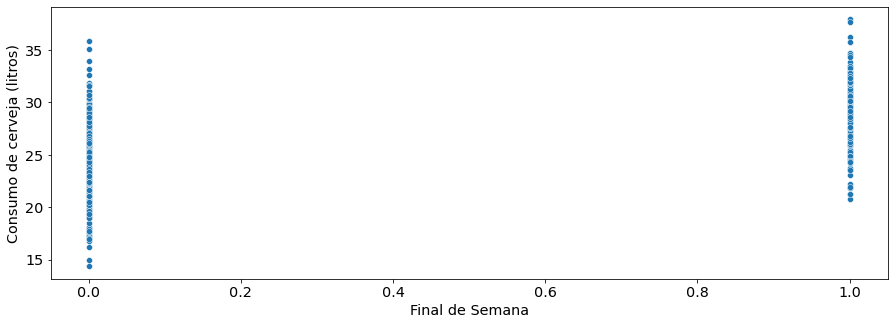

In [11]:
sns.scatterplot(data=df, x= 'Final de Semana', y='Consumo de cerveja (litros)')

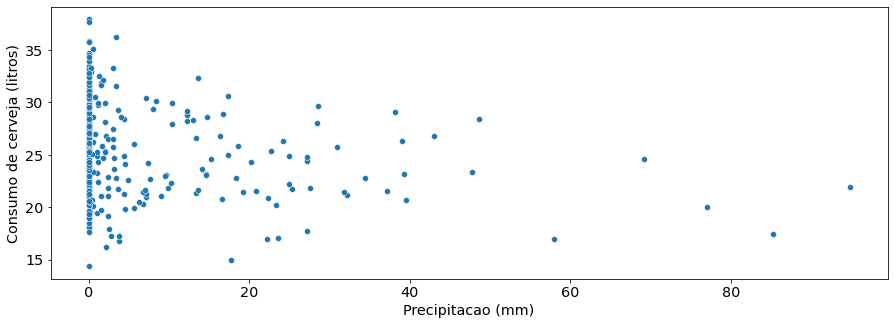

In [12]:
sns.scatterplot(data=df, x= 'Precipitacao (mm)', y='Consumo de cerveja (litros)')

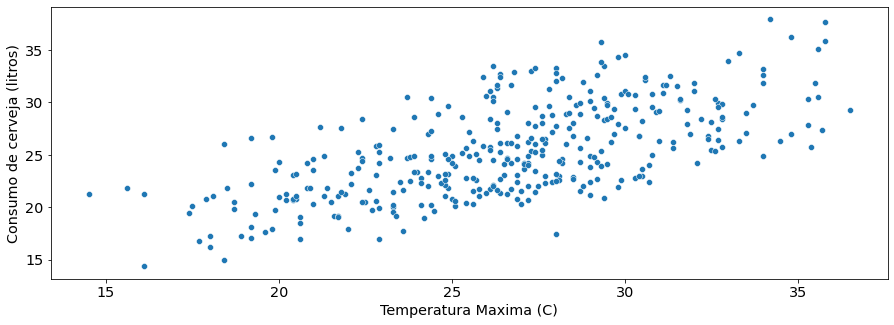

In [13]:
sns.scatterplot(data=df, x= 'Temperatura Maxima (C)', y='Consumo de cerveja (litros)')

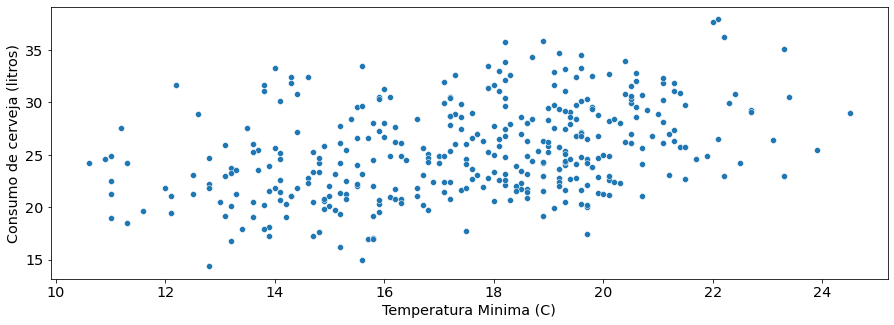

In [14]:
sns.scatterplot(data=df, x= 'Temperatura Minima (C)', y='Consumo de cerveja (litros)')

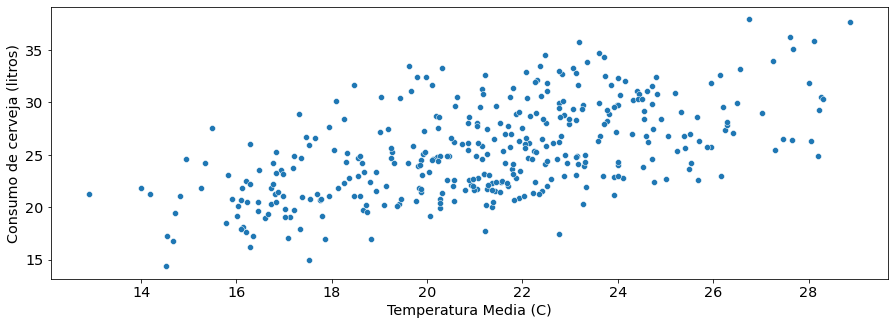

In [15]:
sns.scatterplot(data=df, x= 'Temperatura Media (C)', y='Consumo de cerveja (litros)')

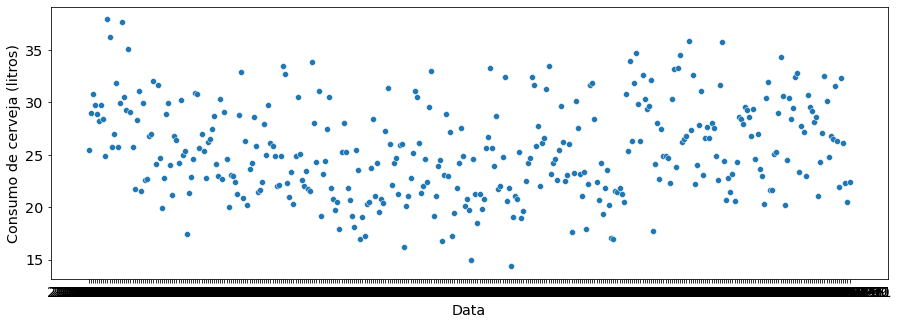

In [16]:
sns.scatterplot(data=df, x= 'Data', y='Consumo de cerveja (litros)')

# Understanding the relationship between maximum temperature and beer consumption

In [17]:
new_df = df[['Temperatura Maxima (C)','Consumo de cerveja (litros)']].copy()

In [18]:
new_df

,Temperatura Maxima (C),Consumo de cerveja (litros)
0,32.5,25.461
1,33.5,28.972
2,29.9,30.814
3,28.6,29.799
4,28.3,28.900
...,...,...
936,NaN,NaN
937,NaN,NaN
938,NaN,NaN
939,NaN,NaN


Drop the lines that does not have values.

In [19]:
new_df = new_df.dropna()

##The lines with null numbers were removed, which left 365 lines instead of 366 as the CSV table shows. This means that there were lines with null attributes in the CSV.

In [20]:
new_df

,Temperatura Maxima (C),Consumo de cerveja (litros)
0,32.5,25.461
1,33.5,28.972
2,29.9,30.814
3,28.6,29.799
4,28.3,28.900
...,...,...
360,28.2,32.307
361,26.7,26.095
362,24.1,22.309
363,22.4,20.467


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Maxima (C)       365 non-null    float64
 1   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


Correlation between the attributes of Maximum Temperature (C) and Beer Consumption (liters)

In [22]:
new_df.corr()

,Temperatura Maxima (C),Consumo de cerveja (litros)
Temperatura Maxima (C),1.000000,0.642672
Consumo de cerveja (litros),0.642672,1.000000


#Creating the DataFrame to store the independent (Maximum temperature) and dependent (Beer consumption) values

In [23]:
x = new_df[['Temperatura Maxima (C)']]
x

,Temperatura Maxima (C)
0,32.5
1,33.5
2,29.9
3,28.6
4,28.3
...,...
360,28.2
361,26.7
362,24.1
363,22.4


In [24]:
x_npy = x.values
x_npy

array([[32.5],
       [33.5],
       [29.9],
       [28.6],
       [28.3],
       [30.5],
       [33.7],
       [32.8],
       [34. ],
       [34.2],
       [34.8],
       [35.4],
       [34.8],
       [34. ],
       [32.8],
       [32.7],
       [35.8],
       [35.6],
       [36.5],
       [35.6],
       [30.9],
       [26.1],
       [26.1],
       [29.4],
       [30. ],
       [28.7],
       [28.7],
       [29.9],
       [29.2],
       [26.9],
       [24.3],
       [28. ],
       [26.5],
       [31.1],
       [23.7],
       [22.9],
       [25.4],
       [28.7],
       [29.5],
       [30.7],
       [29. ],
       [30.4],
       [32.7],
       [32.1],
       [31.6],
       [27.6],
       [27.3],
       [28. ],
       [26.4],
       [28.5],
       [28.2],
       [31.1],
       [30.8],
       [31.4],
       [31.9],
       [29.3],
       [30.3],
       [31.4],
       [27.7],
       [26.3],
       [29.2],
       [29.5],
       [30.5],
       [31.6],
       [28.5],
       [26.6],
       [24

In [25]:
y = new_df['Consumo de cerveja (litros)']
y

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: Consumo de cerveja (litros), Length: 365, dtype: float64

In [26]:
y_npy = y.values
y_npy

array([25.461, 28.972, 30.814, 29.799, 28.9  , 28.218, 29.732, 28.397,
       24.886, 37.937, 36.254, 25.743, 26.99 , 31.825, 25.724, 29.938,
       37.69 , 30.524, 29.265, 35.127, 29.13 , 25.795, 21.784, 28.348,
       31.088, 21.52 , 29.972, 22.603, 22.696, 26.845, 27.03 , 32.057,
       24.097, 31.655, 24.738, 19.95 , 22.821, 28.893, 29.926, 24.062,
       21.137, 26.805, 26.389, 24.219, 30.231, 24.968, 25.343, 17.399,
       21.392, 22.922, 24.567, 30.943, 30.825, 25.692, 26.959, 25.366,
       22.784, 26.241, 26.467, 27.475, 28.749, 24.146, 22.988, 30.3  ,
       22.654, 29.09 , 24.619, 20.016, 23.042, 22.933, 22.409, 21.281,
       28.844, 32.872, 20.903, 26.275, 20.167, 23.628, 24.213, 28.631,
       25.855, 21.406, 21.617, 22.401, 27.989, 24.974, 29.76 , 26.116,
       25.85 , 24.925, 21.979, 22.116, 24.867, 33.45 , 32.713, 22.356,
       21.004, 23.362, 20.298, 24.862, 30.505, 25.07 , 22.62 , 22.001,
       23.469, 21.735, 21.593, 33.822, 28.028, 24.304, 31.108, 19.113,
      

# Separating the dataset into 20% for testing and 80% for training.

In [27]:
from sklearn.model_selection import train_test_split 

In [28]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 100)

#Checking training and test set sizes

In [29]:
print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')

x_train.shape = (292, 1)
y_train.shape = (292,)


In [30]:
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

x_test.shape = (73, 1)
y_test.shape = (73,)


#Training the Linear Regression model with the training set

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()
reg

LinearRegression()

In [33]:
reg.fit(x_train, y_train)

LinearRegression()

#Finding the coefficients theta0 e theta1 -> h(x) = 6.343477335840262 + 0.71295199 * x

In [34]:
reg.intercept_ 

6.343477335840262

In [35]:
reg.coef_ 

array([0.71295199])

#Printing the coefficient of determination (R²) of the linear model with the training set

In [36]:
print(f'R² = {reg.score(x_train, y_train)}')

R² = 0.4430330249418445


#Size prediction for the test set (testing and evaluating data)

In [37]:
x_test

,Temperatura Maxima (C)
147,23.2
125,20.4
314,32.7
56,30.3
241,32.0
...,...
136,22.4
191,19.8
360,28.2
3,28.6


In [38]:
y_test

147    24.683
125    20.680
314    29.569
56     22.784
241    31.833
        ...  
136    28.411
191    26.691
360    32.307
3      29.799
20     29.130
Name: Consumo de cerveja (litros), Length: 73, dtype: float64

In [39]:
y_pred = reg.predict(x_test)
y_pred

array([22.88396353, 20.88769796, 29.65700745, 27.94592267, 29.15794106,
       23.66821072, 26.44872349, 26.37742829, 25.02281951, 30.22736904,
       26.44872349, 25.02281951, 21.45805955, 19.24790838, 23.52562033,
       22.67007794, 23.73950592, 26.94778988, 29.72830265, 24.95152431,
       26.87649469, 21.17287875, 26.37742829, 20.60251716, 26.0209523 ,
       28.01721787, 30.94032104, 27.58944668, 20.60251716, 26.66260909,
       24.95152431, 17.4655284 , 29.01535066, 26.66260909, 24.88022911,
       26.52001869, 22.59878274, 25.7357715 , 20.31733637, 29.22923626,
       20.74510756, 22.02842114, 30.22736904, 26.23483789, 28.08851307,
       25.8070667 , 23.73950592, 26.16354269, 21.52935475, 23.31173473,
       27.16167548, 24.59504831, 23.88209632, 19.81826997, 25.02281951,
       19.10531798, 29.51441705, 27.66074188, 32.36622502, 25.8070667 ,
       25.23670511, 25.8783619 , 28.58757946, 18.74884198, 27.44685628,
       28.44498907, 24.59504831, 30.36995944, 22.31360194, 20.45

In [40]:
type(y_pred)

numpy.ndarray

In [41]:
y_pred.shape

(73,)

##Creating the Dataframe table

In [42]:
results = pd.DataFrame({
    'Maximum temperature (C)': x_test['Temperatura Maxima (C)'],
    'Beer Consumption (liters) (Prediction)': y_pred.round(2),
    'Beer Consumption (liters) (Real One)': y_test.round(2),
    'Error (Residual)': (y_test - y_pred).round(2),
    'Error (Absolute)': abs(y_test - y_pred).round(2),
})
results.describe()

,Maximum temperature (C),Beer Consumption (liters) (Prediction),Beer Consumption (liters) (Real One),Error (Residual),Error (Absolute)
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,26.546575,25.270548,25.695890,0.425616,2.754110
std,4.662113,3.323786,3.815106,3.358340,1.942071
min,15.600000,17.470000,17.290000,-5.160000,0.090000
25%,23.200000,22.880000,22.770000,-2.170000,0.840000
50%,27.300000,25.810000,26.020000,0.400000,2.680000
75%,29.800000,27.590000,28.410000,3.260000,4.300000
max,36.500000,32.370000,32.980000,7.180000,7.180000


# Making the prediction graphs

In [43]:
regression_line_x = x['Temperatura Maxima (C)']
regression_line_y = reg.predict(x)
regression_line_y

array([29.51441705, 30.22736904, 27.66074188, 26.73390429, 26.52001869,
       28.08851307, 30.36995944, 29.72830265, 30.58384504, 30.72643544,
       31.15420663, 31.58197783, 31.15420663, 30.58384504, 29.72830265,
       29.65700745, 31.86715862, 31.72456823, 32.36622502, 31.72456823,
       28.37369387, 24.95152431, 24.95152431, 27.30426588, 27.73203707,
       26.80519949, 26.80519949, 27.66074188, 27.16167548, 25.5218859 ,
       23.66821072, 26.30613309, 25.23670511, 28.51628427, 23.24043953,
       22.67007794, 24.45245791, 26.80519949, 27.37556108, 28.23110347,
       27.01908508, 28.01721787, 29.65700745, 29.22923626, 28.87276026,
       26.0209523 , 25.8070667 , 26.30613309, 25.16540991, 26.66260909,
       26.44872349, 28.51628427, 28.30239867, 28.73016986, 29.08664586,
       27.23297068, 27.94592267, 28.73016986, 26.09224749, 25.09411471,
       27.16167548, 27.37556108, 28.08851307, 28.87276026, 26.66260909,
       25.3080003 , 23.73950592, 22.95525873, 25.5218859 , 26.37

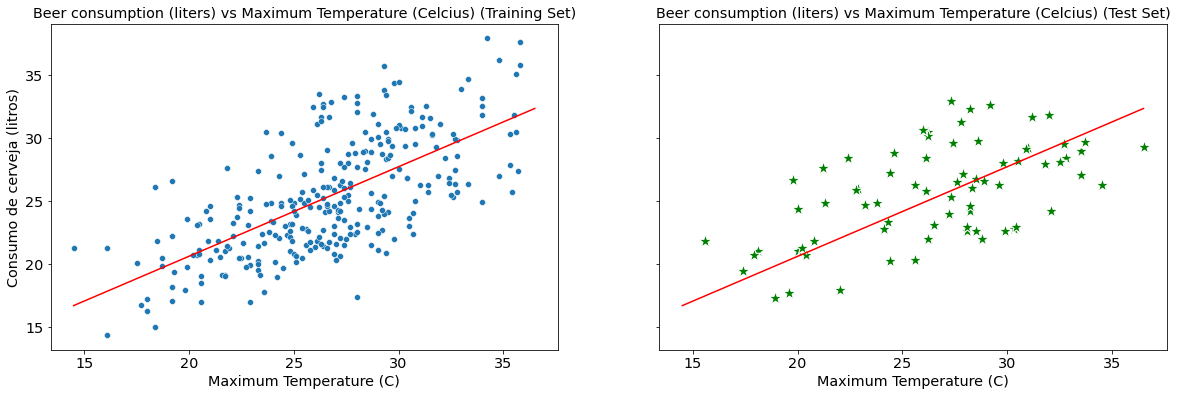

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = x['Temperatura Maxima (C)']
regression_line_y = reg.predict(x)

sns.scatterplot(x=x_train['Temperatura Maxima (C)'], y=y_train, ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])
axs[0].set_title('Beer consumption (liters) vs Maximum Temperature (Celcius) (Training Set)')
axs[0].set_xlabel('Maximum Temperature (C)')
axs[0].set_ylabel('Consumo de cerveja (litros)')

sns.scatterplot(x=x_test['Temperatura Maxima (C)'], y=y_test, color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])
axs[1].set_title('Beer consumption (liters) vs Maximum Temperature (Celcius) (Test Set)')
axs[1].set_xlabel('Maximum Temperature (C)')
axs[1].set_ylabel('Beer consumption (liters)')

display()

In [45]:
x_labeled = x.copy()
x_labeled['Label'] = 'Train'
x_labeled
x_labeled.loc[x_test.index, 'Label'] = 'Test'
x_labeled

,Temperatura Maxima (C),Label
0,32.5,Train
1,33.5,Test
2,29.9,Train
3,28.6,Test
4,28.3,Train
...,...,...
360,28.2,Test
361,26.7,Train
362,24.1,Train
363,22.4,Train


# Final prediction, test and training data

Text(0, 0.5, 'Beer consumption (liters)')

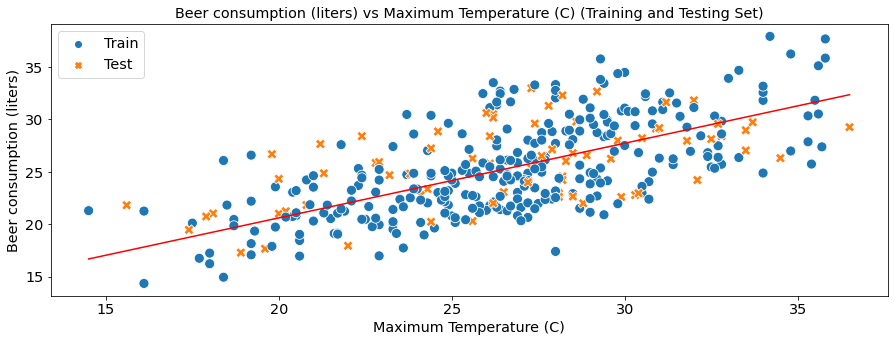

In [46]:
sns.scatterplot(data=x_labeled, x='Temperatura Maxima (C)', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Beer consumption (liters) vs Maximum Temperature (C) (Training and Testing Set)')
plt.xlabel('Maximum Temperature (C)')
plt.ylabel('Beer consumption (liters)')

# Error metrics:

### Mean Absolute Error (MAE):
<h4>Used as a base measurement for prediction errors.<h4>

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

2.7537597554489968

### Mean square error (MSE)
<h4> In MSE, larger error variations will return larger MSE values.</h4>

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
MSE = mean_squared_error(y_test, y_pred)
MSE

11.301303318532403

## Root Mean Square Error (RMSE)
<h4>Used to compare regression models.</h4>


In [51]:
RSME_manually = np.sqrt(MSE)
RSME_manually

3.361741114144931

In [52]:
RSME = mean_squared_error(y_test, y_pred, squared=False)
RSME

3.361741114144931

#R2
<h4>Used to measure the accuracy of the predicted model compared to the actual data.</h4>

In [53]:
reg.score(x_test, y_test)

0.2127503803778158

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2127503803778158

# Results:
<h4>Beer consumption is higher on days with higher maximum temperature and less precipitation, that is, hot and dry, in addition to being higher on weekends as well, which was expected.</h4>
<h4>The coefficient of determination and the error indicators demonstrate that the prediction made by the model is not satisfactory, since there is a large difference between the predicted and actual data. To obtain a more accurate prediction, it would be necessary to use another type of neural network model.</h4>